# Python Gaussian Mixture Model Clustering

This example explains k-means clustering with Python 3, pandas and scikit-learn on Jupyter Notebook.
## Requirements
To use this example you need Python 3 and latest versions of pandas and scikit-learn. I used Anaconda distribution to install.

### Data Set:
https://catalog.data.gov/dataset/2010-census-populations-by-zip-code

### ML life-cycle:
1.	Business objective connected to it.
2.	Data set, wrangle and prepare it.
3.	What the data is saying

## Algorithm
1.	A Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset.

In [3]:
# GMM Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('2010_Census_Populations.csv')

#Data Prepare
# Replacing 0 to NaN
dataset[['Total Population','Median Age']] = dataset[['Total Population','Median Age']].replace(0, np.NaN)
X = dataset.iloc[:, [1,2]].values

# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X)
X = imputer.transform(X)
print(X[:20])

[[1.00000000e+00 7.35000000e+01]
 [5.71100000e+04 2.66000000e+01]
 [5.12230000e+04 2.55000000e+01]
 [6.62660000e+04 2.63000000e+01]
 [6.21800000e+04 3.48000000e+01]
 [3.76810000e+04 3.39000000e+01]
 [5.91850000e+04 3.24000000e+01]
 [4.09200000e+04 2.40000000e+01]
 [3.23270000e+04 3.97000000e+01]
 [3.80000000e+03 3.78000000e+01]
 [1.03892000e+05 2.62000000e+01]
 [3.11030000e+04 3.63000000e+01]
 [1.17720000e+04 4.46000000e+01]
 [3.39646891e+04 4.48000000e+01]
 [1.89860000e+04 3.13000000e+01]
 [4.75960000e+04 3.39000000e+01]
 [2.37680000e+04 2.94000000e+01]
 [4.93100000e+04 3.32000000e+01]
 [6.44580000e+04 3.58000000e+01]
 [3.89670000e+04 3.46000000e+01]]


In [4]:
# Fitting GMM to the dataset
from sklearn.mixture import GaussianMixture as GMM
#gmm = GMM(n_components=4, covariance_type='full', random_state=42).fit(X)
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)

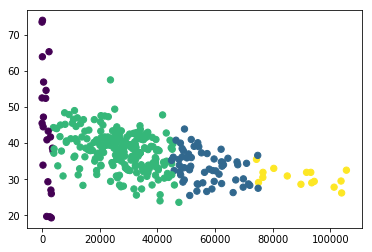

In [6]:
# Scatter chart of the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

## Data Story:
This data is 2010 census data. After clustering using GMM we plotted data which clearly shows most of the population lies around 38 of median age. As population grows median ages is also changing and its coming down. This model gives idea, if business need to manufacture products according to ~age of 45 for 5K population, ~age of 38 for next 45K population, ~age of 36 for 20K, and age of 35 for 30K.

## Reference:
[Python Data Science Handbook - Gaussian Mixture Model](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.12-Gaussian-Mixtures.ipynb)
